### Problem Statement: Understanding Rental Market Trends for Better Decision Making
We collected rental property data from a real estate website to analyze how different factors influence rental prices and availability. The goal is to help tenants, landlords, and investors make informed decisions by identifying trends in:
- Rental pricing across different locations, property types, and BHKs
- Tenant preferences (Bachelors vs. Family) and its effect on price
- Which locations are expensive or affordable

In [1]:
import re
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:


# Headers to mimic a real browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.64 Safari/537.36'
}

# List of cities & property types
cities = [
    "ahmedabad", "bangalore", "chennai", "gurgaon", "hyderabad",
    "indore", "jaipur", "kolkata", "lucknow", "mumbai", "navi-mumbai",
    "new-delhi", "noida", "pune", "thane"
]
property_types = ["flats", "independent-house", "villa"]

# Data storage dictionary
data = {
    "Property Type": [], "Location": [], "BHK": [], "Society Name": [], "Furnishing": [],
    "Bathrooms": [], "Balconies": [], "Facing Direction": [], "Carpet Area": [],
    "Floor Details": [], "Rental Price": [], "Tenant Preferred": []
}

# Scraping loop
for city in cities:
    for prop in property_types:
        #using the url of the website
        url = f"https://www.magicbricks.com/{prop}-for-rent-in-{city}-pppfr"
        print(f"Scraping: {url}")

        #requesting to access the url to get data
        page = requests.get(url, headers=headers)

        #if the status code is 200 then succesfully retrieve the data
        if page.status_code != 200:
            print(f"Failed to retrieve data for {url}")
            continue
        #geeting the data in html format
        soup = BeautifulSoup(page.text, 'html.parser')

        #using attribsute and class we can scrap the data from the page
        for listing in soup.find_all("div", class_="mb-srp__list"):
            text = listing.text.strip()

            # Property Type & Location
            data["Property Type"].append(prop)
            data["Location"].append(city)

            # BHK Extraction
            bhk_match = re.search(r"(\d+)\sBHK", text)
            data["BHK"].append(bhk_match.group(1) if bhk_match else np.nan)

            # Society Name
            society_match = re.search(r"Society\s([A-Za-z\s]+)", text)
            data["Society Name"].append(society_match.group(1).strip() if society_match else np.nan)

            # Furnishing Type
            furnishing_match = re.search(r"Furnishing\s?(Furnished|Semi-Furnished|Unfurnished)", text)
            data["Furnishing"].append(furnishing_match.group(1) if furnishing_match else np.nan)

            # Bathrooms
            bath_match = re.search(r"Bathroom\s?(\d+)", text)
            data["Bathrooms"].append(bath_match.group(1) if bath_match else np.nan)

            # Balconies
            balcony_match = re.search(r"Balcony\s?(\d+)", text)
            data["Balconies"].append(balcony_match.group(1) if balcony_match else np.nan)

            # Facing Direction
            direction_match = re.search(r"facing\s([A-Za-z-]+)", text, re.IGNORECASE)
            data["Facing Direction"].append(direction_match.group(1) if direction_match else np.nan)

            # Carpet Area
            area_match = re.search(r"Area\s?(\d+)\s?(sqft|sq-ft)", text, re.IGNORECASE)
            data["Carpet Area"].append(area_match.group(1) if area_match else np.nan)

            # Floor Details (Extracting "10 out of 12" format)
            floor_match = re.search(r"Floor\s?(\d+)\s?out\s?of\s?(\d+)", text, re.IGNORECASE)
            data["Floor Details"].append(f"{floor_match.group(1)}" if floor_match else np.nan)

            # Rental Price
            rent_match = re.search(r"₹([\d,]+)", text)
            data["Rental Price"].append(rent_match.group(1) if rent_match else np.nan)

            # Tenant Preferred (Bachelors/Family)
            tenant_match = re.search(r"Tenant Preferred\s?(Bachelors|Family|Bachelors/Family)", text)
            data["Tenant Preferred"].append(tenant_match.group(1) if tenant_match else np.nan)

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_excel("magicbricks_rent_data_final.xlsx", index=False)

print("Data Scraping Completed & Saved to 'magicbricks_rent_data_final.xlsx'!")


Scraping: https://www.magicbricks.com/flats-for-rent-in-ahmedabad-pppfr
Scraping: https://www.magicbricks.com/independent-house-for-rent-in-ahmedabad-pppfr
Scraping: https://www.magicbricks.com/villa-for-rent-in-ahmedabad-pppfr
Scraping: https://www.magicbricks.com/flats-for-rent-in-bangalore-pppfr
Scraping: https://www.magicbricks.com/independent-house-for-rent-in-bangalore-pppfr
Scraping: https://www.magicbricks.com/villa-for-rent-in-bangalore-pppfr
Scraping: https://www.magicbricks.com/flats-for-rent-in-chennai-pppfr
Scraping: https://www.magicbricks.com/independent-house-for-rent-in-chennai-pppfr
Scraping: https://www.magicbricks.com/villa-for-rent-in-chennai-pppfr
Scraping: https://www.magicbricks.com/flats-for-rent-in-gurgaon-pppfr
Scraping: https://www.magicbricks.com/independent-house-for-rent-in-gurgaon-pppfr
Scraping: https://www.magicbricks.com/villa-for-rent-in-gurgaon-pppfr
Scraping: https://www.magicbricks.com/flats-for-rent-in-hyderabad-pppfr
Scraping: https://www.magicb

In [11]:
# Reading the csv file for better understanding

df = pd.read_csv(r"C:\Users\DELL\Documents\magic bricks\magicbricks_rent_data_final.csv")
df

,Property Type,Location,BHK,Society Name,Furnishing,Bathrooms,Balconies,Facing Direction,Carpet Area,Floor Details,Rental Price,Tenant Preferred
0,flats,ahmedabad,3.0,NaN,Unfurnished,3.0,3.0,PropertyThis,1000.0,9.0,"16,000",Bachelors
1,flats,ahmedabad,3.0,Name,Unfurnished,3.0,1.0,NaN,1004.0,NaN,"27,500",Bachelors
2,flats,ahmedabad,2.0,NaN,Semi-Furnished,2.0,1.0,PropertyYou,NaN,9.0,"17,000",Bachelors
3,flats,ahmedabad,3.0,NaN,Semi-Furnished,3.0,1.0,PropertyIf,1500.0,4.0,"35,000",Bachelors
4,flats,ahmedabad,2.0,NaN,Furnished,2.0,1.0,NaN,1200.0,6.0,"15,000",Bachelors
...,...,...,...,...,...,...,...,...,...,...,...,...
1336,villa,thane,1.0,Name,Furnished,1.0,NaN,NaN,560.0,4.0,"22,000",NaN
1337,villa,thane,1.0,NaN,Semi-Furnished,1.0,1.0,NaN,485.0,NaN,"13,800",NaN
1338,villa,thane,3.0,NaN,Furnished,3.0,3.0,PropertySuperbly,980.0,17.0,"55,000",NaN
1339,villa,thane,2.0,Name,Furnished,2.0,1.0,NaN,654.0,1.0,"37,000",NaN


In [13]:
#first 5 rows 
df.head(5)

,Property Type,Location,BHK,Society Name,Furnishing,Bathrooms,Balconies,Facing Direction,Carpet Area,Floor Details,Rental Price,Tenant Preferred
0,flats,ahmedabad,3.0,NaN,Unfurnished,3.0,3.0,PropertyThis,1000.0,9.0,"16,000",Bachelors
1,flats,ahmedabad,3.0,Name,Unfurnished,3.0,1.0,NaN,1004.0,NaN,"27,500",Bachelors
2,flats,ahmedabad,2.0,NaN,Semi-Furnished,2.0,1.0,PropertyYou,NaN,9.0,"17,000",Bachelors
3,flats,ahmedabad,3.0,NaN,Semi-Furnished,3.0,1.0,PropertyIf,1500.0,4.0,"35,000",Bachelors
4,flats,ahmedabad,2.0,NaN,Furnished,2.0,1.0,NaN,1200.0,6.0,"15,000",Bachelors


In [15]:
# last 5 rows
df.tail(5)

,Property Type,Location,BHK,Society Name,Furnishing,Bathrooms,Balconies,Facing Direction,Carpet Area,Floor Details,Rental Price,Tenant Preferred
1336,villa,thane,1.0,Name,Furnished,1.0,NaN,NaN,560.0,4.0,"22,000",NaN
1337,villa,thane,1.0,NaN,Semi-Furnished,1.0,1.0,NaN,485.0,NaN,"13,800",NaN
1338,villa,thane,3.0,NaN,Furnished,3.0,3.0,PropertySuperbly,980.0,17.0,"55,000",NaN
1339,villa,thane,2.0,Name,Furnished,2.0,1.0,NaN,654.0,1.0,"37,000",NaN
1340,villa,thane,1.0,NaN,Furnished,2.0,NaN,Propertyprime,580.0,NaN,"30,000",NaN


In [17]:
#size of the data number of rows and columns
df.shape

(1341, 12)

rows = 1341
columns = 12

In [19]:
# correcting headers
df.columns = df.columns.str.strip().str.replace(" ","_").str.lower()

In [21]:
df.columns

Index(['property_type', 'location', 'bhk', 'society_name', 'furnishing',
       'bathrooms', 'balconies', 'facing_direction', 'carpet_area',
       'floor_details', 'rental_price', 'tenant_preferred'],
      dtype='object')

In [23]:
# information about data non null counts type of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_type     1341 non-null   object 
 1   location          1341 non-null   object 
 2   bhk               1323 non-null   float64
 3   society_name      155 non-null    object 
 4   furnishing        1334 non-null   object 
 5   bathrooms         1331 non-null   float64
 6   balconies         956 non-null    float64
 7   facing_direction  410 non-null    object 
 8   carpet_area       1278 non-null   float64
 9   floor_details     599 non-null    float64
 10  rental_price      1340 non-null   object 
 11  tenant_preferred  1320 non-null   object 
dtypes: float64(5), object(7)
memory usage: 125.8+ KB


In [25]:
# checking any duplicates are there
df.duplicated().sum()

5

In [11]:
#there are 5 duplicate rows

In [27]:
df=df.drop_duplicates()

In [13]:
#all duplicates are removed

Checking any null values

In [29]:
df.isnull().sum()

property_type          0
location               0
bhk                   18
society_name        1181
furnishing             7
bathrooms             10
balconies            384
facing_direction     927
carpet_area           63
floor_details        740
rental_price           1
tenant_preferred      21
dtype: int64

In [31]:
# ['society_name','facing_direction','floor_details'] excessive missing values
#Columns like "Society Name", "Facing Direction", and "Floor Details" have too many missing values, so we drop them.

df = df.drop(columns=['society_name','facing_direction','floor_details'])

In [33]:
df.columns

Index(['property_type', 'location', 'bhk', 'furnishing', 'bathrooms',
       'balconies', 'carpet_area', 'rental_price', 'tenant_preferred'],
      dtype='object')

In [35]:
df.isnull().sum()

property_type         0
location              0
bhk                  18
furnishing            7
bathrooms            10
balconies           384
carpet_area          63
rental_price          1
tenant_preferred     21
dtype: int64

# bhk column has nan values and change column type 

In [37]:
df['bhk']=df['bhk'].astype('str').str.get(0)

In [39]:
df['bhk'].unique()

array(['3', '2', '4', '1', '5', '6', '7', 'n', '8'], dtype=object)

In [41]:
# we fill the nann values with the most common bhk are 2 or 3
# so we fill bhk by 2 or 3 value
# df['bhk'].fillna(np.random.choice(['2','3']),inplace = True)
df.fillna({'bhk':np.random.choice(['2','3'])},inplace = True)

In [43]:
# here 'n' is a invalid value we change it by new bhk value
df['bhk']=df['bhk'].str.replace('n','2')

In [45]:
df['bhk'].unique()

array(['3', '2', '4', '1', '5', '6', '7', '8'], dtype=object)

In [47]:
df['bhk']=df['bhk'].astype('int')

In [49]:
df['bhk'].isnull().sum()

0

# furnishing column has nan values

In [51]:
df['furnishing'].isnull().sum()

7

In [53]:
#there are 7 null values

In [55]:
df['furnishing'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished', nan], dtype=object)

In [57]:
# for nan values we use unfurnished value

In [61]:
df['furnishing'].fillna('Unfurnished',inplace=True)

In [63]:
df['furnishing'].isnull().sum()

0

# bathrooms column has nan values and data type changing

In [65]:
df['bathrooms'].isnull().sum()

10

In [67]:
df['bathrooms'].mode()

0    2.0
Name: bathrooms, dtype: float64

In [69]:
# minimum 2 bathroom has to be in house.
df['bathrooms'].fillna(df['bathrooms'].mode()[0],inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9600\2546157932.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].fillna(df['bathrooms'].mode()[0],inplace = True)


In [71]:
df['bathrooms']=df['bathrooms'].astype('int')

In [73]:
df['bathrooms'].isnull().sum()

0

# balconies column has nan values and handling irrelevant values like 2.000e4

In [75]:
df['balconies'].isnull().sum()

384

In [77]:
df['balconies']=df['balconies'].astype('str').str.get(0)

In [79]:
df['balconies'].unique()

array(['3', '1', 'n', '2', '4', '5', '6', '8', '9', '7'], dtype=object)

In [81]:
# every house has minimum 1 balconie 
df['balconies'].fillna(df['balconies'].mode()[0],inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9600\656677058.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balconies'].fillna(df['balconies'].mode()[0],inplace = True)


In [83]:
df['balconies'].unique()

array(['3', '1', 'n', '2', '4', '5', '6', '8', '9', '7'], dtype=object)

In [85]:
#here 'n' is a invalid value we replace with the 1
df['balconies']=df['balconies'].str.replace('n','1')

In [87]:
df['balconies']=df['balconies'].astype('int')

In [89]:
df['balconies'].isnull().sum()

0

# carpet_area 

In [91]:
df['carpet_area'].isnull().sum()

63

In [93]:
df.dropna(subset=['carpet_area'],how='any',axis=0,inplace=True)

In [95]:
df['carpet_area'].isnull().sum()

0

# rental price removing null values and invalid data

In [97]:
df['rental_price'].isnull().sum()

0

In [99]:
df['rental_price'].unique()

array(['16,000', '27,500', '35,000', '15,000', '13,500', '8,500',
       '54,000', '30,000', '33,000', '20,000', '18,000', '48,000',
       '22,000', '14,000', '45,000', '32,000', '35,500', '15,500',
       '41,000', '6,000', '14,500', '12,500', '12,000', '25,000', '5,000',
       '28,000', '36,000', '80,000', '65,000', '13,000', '50,000',
       '75,000', '90,000', '26,000', '60,000', '57,000', '31,000',
       '70,000', '75', '62,000', '21,000', '10,000', '63,000', '6,500',
       '40,000', '46,000', '1', '85,000', '9,900', '7,900', '8,000',
       '27,000', '2', '3', '55,000', '78,000', '10,500', '16,500',
       '17,000', '7,000', '68,000', '3,500', '7,500', '29,500', '7,300',
       '9,500', '13,900', '42,000', '19,000', '53,000', '49,000',
       '24,000', '84,000', '66,000', '11,500', '95,000', '43,000',
       '11,000', '5,500', '38,000', '24,933', '7', '19,500', '81,000',
       '9,000', '17,500', '28,600', '4,000', '7,200', '23,000', '18,500',
       '8,685', '24,999', '24,50

In [101]:
invalid_values=['75','1','2','3','7','5','14', '4', '11', '8', '6','15', '9']
df['rental_price'] = df['rental_price'].apply(lambda x: str(x) + '000' if str(x) in invalid_values else x)

In [103]:
df['rental_price'].unique()

array(['16,000', '27,500', '35,000', '15,000', '13,500', '8,500',
       '54,000', '30,000', '33,000', '20,000', '18,000', '48,000',
       '22,000', '14,000', '45,000', '32,000', '35,500', '15,500',
       '41,000', '6,000', '14,500', '12,500', '12,000', '25,000', '5,000',
       '28,000', '36,000', '80,000', '65,000', '13,000', '50,000',
       '75,000', '90,000', '26,000', '60,000', '57,000', '31,000',
       '70,000', '75000', '62,000', '21,000', '10,000', '63,000', '6,500',
       '40,000', '46,000', '1000', '85,000', '9,900', '7,900', '8,000',
       '27,000', '2000', '3000', '55,000', '78,000', '10,500', '16,500',
       '17,000', '7,000', '68,000', '3,500', '7,500', '29,500', '7,300',
       '9,500', '13,900', '42,000', '19,000', '53,000', '49,000',
       '24,000', '84,000', '66,000', '11,500', '95,000', '43,000',
       '11,000', '5,500', '38,000', '24,933', '7000', '19,500', '81,000',
       '9,000', '17,500', '28,600', '4,000', '7,200', '23,000', '18,500',
       '8,685', '

In [105]:
#removing the ',' by replace method
df['rental_price']=df['rental_price'].str.replace(",","")

In [107]:
df.dropna(subset=['rental_price'],how='any',axis=0,inplace=True)

In [109]:

df['rental_price']=df['rental_price'].astype('int')

# tenant_preferred

In [111]:
df['tenant_preferred'].isnull().sum()

21

In [113]:
df['tenant_preferred'].unique()

array(['Bachelors', 'Family', nan], dtype=object)

In [115]:
# we study the source that and find that we have bachelors/family values also there.
# some owner preferd only Bachelors 
# some owner prefered only family 
# some owner prefered both 
#so we fill the nan value with bachelors/family this value
df['tenant_preferred'].fillna('bachelors/family',inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_9600\201112491.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tenant_preferred'].fillna('bachelors/family',inplace=True)


In [66]:
df['tenant_preferred'].isnull().sum()

0

In [117]:
# we check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1340
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_type     1273 non-null   object 
 1   location          1273 non-null   object 
 2   bhk               1273 non-null   int32  
 3   furnishing        1273 non-null   object 
 4   bathrooms         1273 non-null   int32  
 5   balconies         1273 non-null   int32  
 6   carpet_area       1273 non-null   float64
 7   rental_price      1273 non-null   int32  
 8   tenant_preferred  1273 non-null   object 
dtypes: float64(1), int32(4), object(4)
memory usage: 79.6+ KB


### Column Overview:
- property_type (Categorical) – Type of property (flats, villas, independent houses).
- location (Categorical) – City where the property is located.
- bhk (Numerical, Discrete) – Number of bedrooms in the property.
- furnishing (Categorical) – Furnishing status (Furnished, Semi-Furnished, Unfurnished).
- bathrooms (Numerical, Discrete) – Number of bathrooms.
- balconies (Numerical, Discrete) – Number of balconies.
- carpet_area (Numerical, Continuous) – Carpet area in square feet.
- rental_price (Numerical, Continuous) – Monthly rent in INR.
- tenant_preferred (Categorical) – Preferred tenants (Bachelors, Family).

In [121]:
df.describe()

,bhk,bathrooms,balconies,carpet_area,rental_price
count,1273.000000,1273.000000,1273.00000,1273.000000,1273.000000
mean,2.524745,2.500393,1.62608,1526.362137,24274.249018
std,1.183439,1.318784,1.02255,1507.834624,20623.783812
min,1.000000,1.000000,1.00000,15.000000,1000.000000
25%,2.000000,2.000000,1.00000,688.000000,9500.000000
50%,2.000000,2.000000,1.00000,1100.000000,18000.000000
75%,3.000000,3.000000,2.00000,1800.000000,35000.000000
max,8.000000,10.000000,9.00000,15500.000000,95000.000000


In [70]:
# here description of each column with thier count , mean, std, minimum value, 25%, 50%, 75%, max value

# Outliers detection

In [72]:
# The dataset contains 1,273 entries with 9 columns. The key numerical columns for outlier detection are:
# BHK (Number of Bedrooms)
# Bathrooms
# Balconies
# Carpet Area (sqft)
# Rental Price (INR)

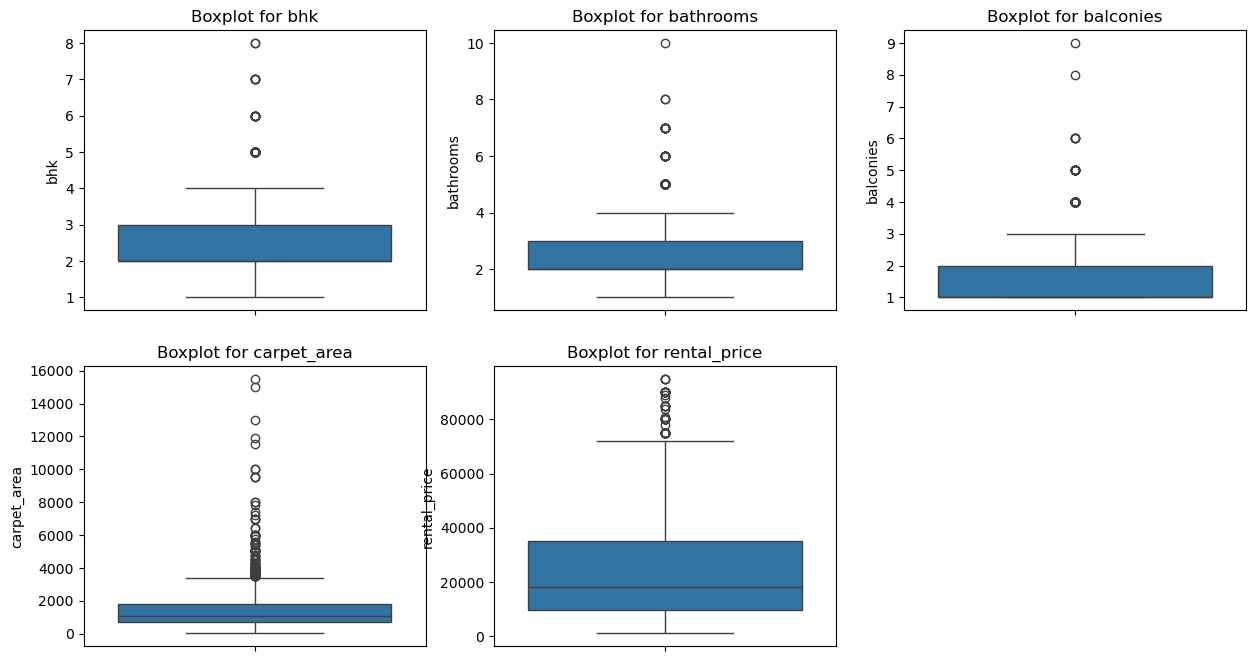

In [123]:
numeric_columns = ['bhk','bathrooms','balconies','carpet_area','rental_price']

plt.figure(figsize=(15,8))
for i,col in enumerate(numeric_columns,1):
    plt.subplot(2,3,i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot for {col}')
plt.show()

The boxplots reveal outliers in multiple columns:

- BHK: Outliers beyond 4 BHK (up to 8 BHK).
- Bathrooms: Some listings have more than 6 bathrooms, which might be unusual.
- Balconies: Few listings have more than 3 balconies, with outliers reaching 9.
- Carpet Area: Several extreme values above 3000 sqft.
- Rental Price: A few properties have rental prices exceeding ₹80,000.

# Handling outlier using iQR technique

In [125]:
def rem_outliers(df,column):
    Q1 = df[column].quantile(0.25) #25th percentile
    Q3 = df[column].quantile(0.75)  #75th percentile
    IQR = Q3 - Q1 #IQR value
    ll = Q1 - 1.5 * IQR # lower limit
    up = Q3 + 1.5 * IQR #upper limit
    return df[(df[column]>=ll) & (df[column]<=up)] #values less than lower limit and values greater than upper limit are outliers
    
numeric_columns = ["bhk", "bathrooms", "balconies", "carpet_area", "rental_price"] #numeric columns

for col in numeric_columns:
    df = rem_outliers(df,col) #calling outlier function

In [127]:
df.shape

(967, 9)

#### after handling outliers we have left 967 rows and 9 columns

In [129]:
df.head(5)

,property_type,location,bhk,furnishing,bathrooms,balconies,carpet_area,rental_price,tenant_preferred
0,flats,ahmedabad,3,Unfurnished,3,3,1000.0,16000,Bachelors
1,flats,ahmedabad,3,Unfurnished,3,1,1004.0,27500,Bachelors
3,flats,ahmedabad,3,Semi-Furnished,3,1,1500.0,35000,Bachelors
4,flats,ahmedabad,2,Furnished,2,1,1200.0,15000,Bachelors
5,flats,ahmedabad,2,Unfurnished,2,1,600.0,13500,Bachelors


In [80]:
# here we see more flats area availabel for rent than house and villa
# most of the people prefer flats for ease

### univariate analysis

In [82]:
# for univariate analysis we can use histogram, count plot,box plot
# numeric column ->carpet_area, rental_price
# categorical columns-> property_type, location, furnishing, tenant_prefered,bhk,balconies


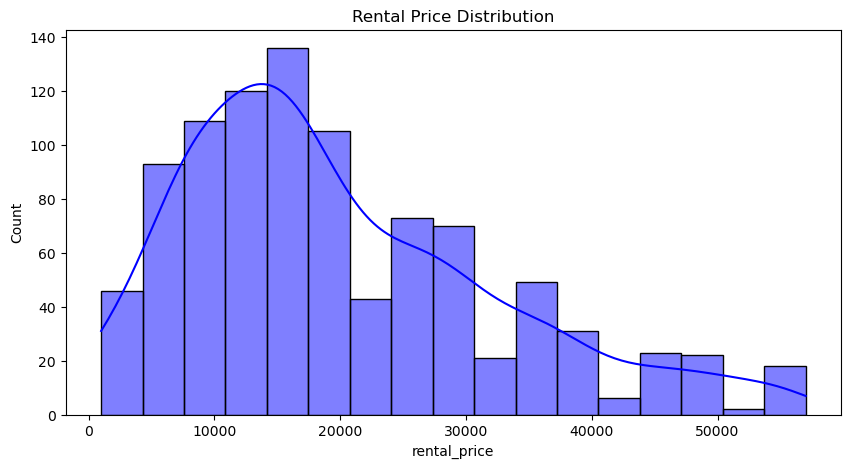

In [131]:
# rental price
plt.figure(figsize=(10,5))
sns.histplot(df['rental_price'],kde=True,color='blue')
plt.title(f'Rental Price Distribution')
plt.savefig("rental_price.png", dpi=300, bbox_inches="tight")
plt.show()

### insight 
- most of the rental price range is between 10,000 to 20,000 mostly affordable for the tenants 
- there we say that most of the property listing for the rent having price range 10k to 20k

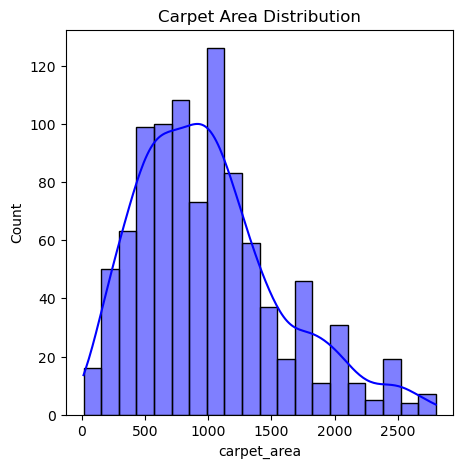

In [133]:
# carpet area
plt.figure(figsize=(5,5))
sns.histplot(df['carpet_area'],kde=True,color='blue')
plt.title(f'Carpet Area Distribution')
plt.show()

### insight
- average room size is 500 to 1500 sqft

C:\Users\DELL\AppData\Local\Temp\ipykernel_9600\3088090272.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['property_type'],palette='muted')


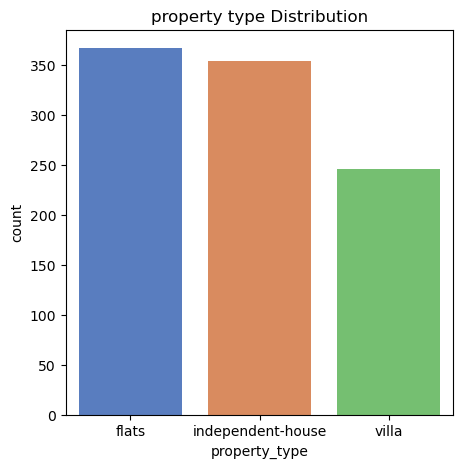

In [135]:
#property type
# we used count plot bcz property type has categorical values i.e , flats,houses and villa
plt.figure(figsize=(5,5))
sns.countplot(x=df['property_type'],palette='muted')
plt.title(f'property type Distribution')
plt.savefig('propertytype.png',dpi=300, bbox_inches="tight")
plt.show()

### insight
- flats are prefered more for rent

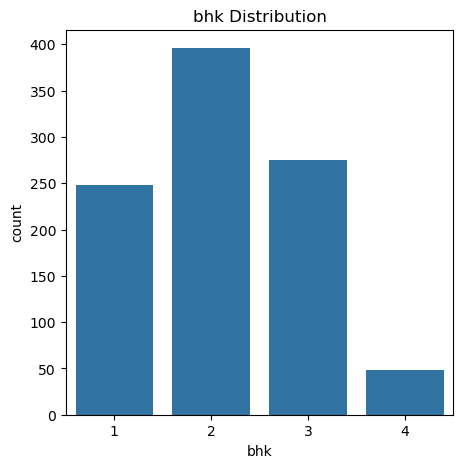

In [137]:
# bhk
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='bhk')
plt.title(f'bhk Distribution')
plt.show()

### insight
- most prefered room are 2 bhk
- least prefered is 4 bhk 

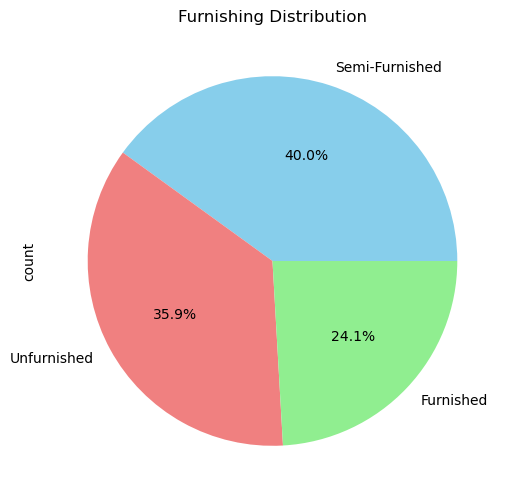

In [139]:
plt.figure(figsize=(6, 6))
df['furnishing'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Furnishing Distribution')
plt.savefig('furnishing.png',dpi=300,bbox_inches='tight')
plt.show()

### insights:
- most of the properties listed are semi-furnished

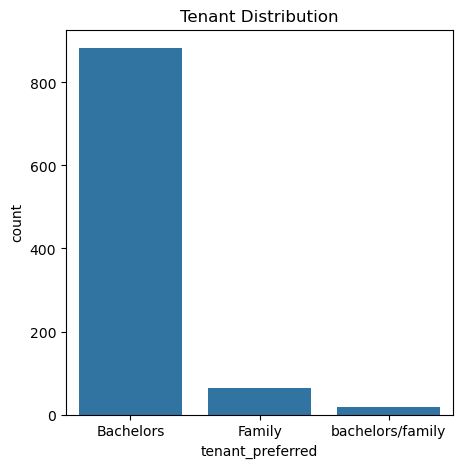

In [141]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='tenant_preferred')
plt.title(f'Tenant Distribution')
plt.show()

### insights:
- here we can say that most of the owners gives thier property on rent to the bachelors, they preferred bachelors more

In [143]:
df['location'].value_counts()

location
lucknow        82
indore         79
pune           78
thane          78
kolkata        77
jaipur         73
chennai        70
ahmedabad      63
noida          59
mumbai         58
navi-mumbai    57
bangalore      53
new-delhi      49
hyderabad      48
gurgaon        43
Name: count, dtype: int64

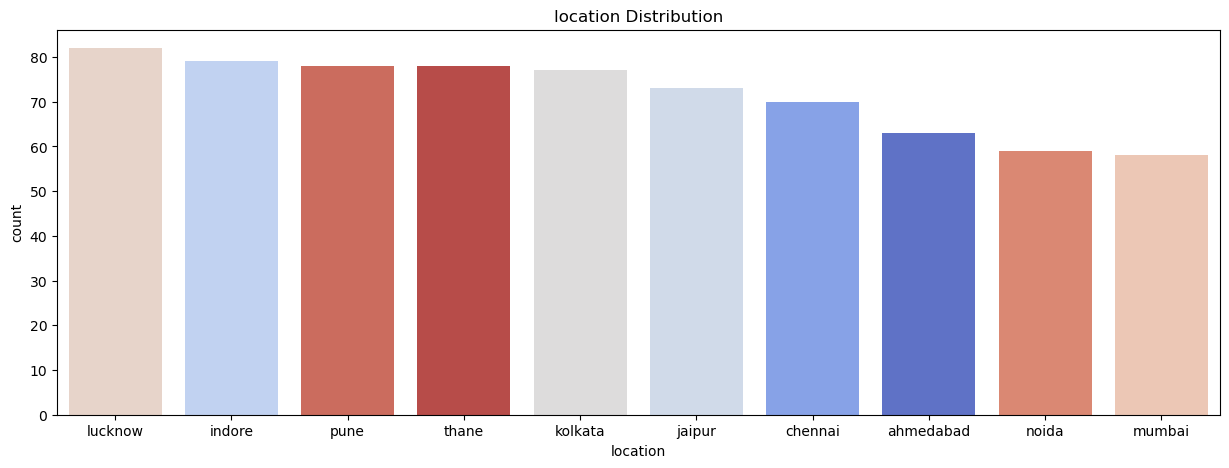

In [145]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='location',palette="coolwarm",hue='location',order = df['location'].value_counts().head(10).index)
plt.title(f'location Distribution')
plt.savefig('location.png',dpi=300,bbox_inches='tight')
plt.show()

### insights:
- these are the top 10 cities where more number of properties are located
- lucknow has more number of properties on rent than other cities


### bivariate analysis


C:\Users\DELL\AppData\Local\Temp\ipykernel_9600\1503376501.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='rental_price', x='location', palette='coolwarm',


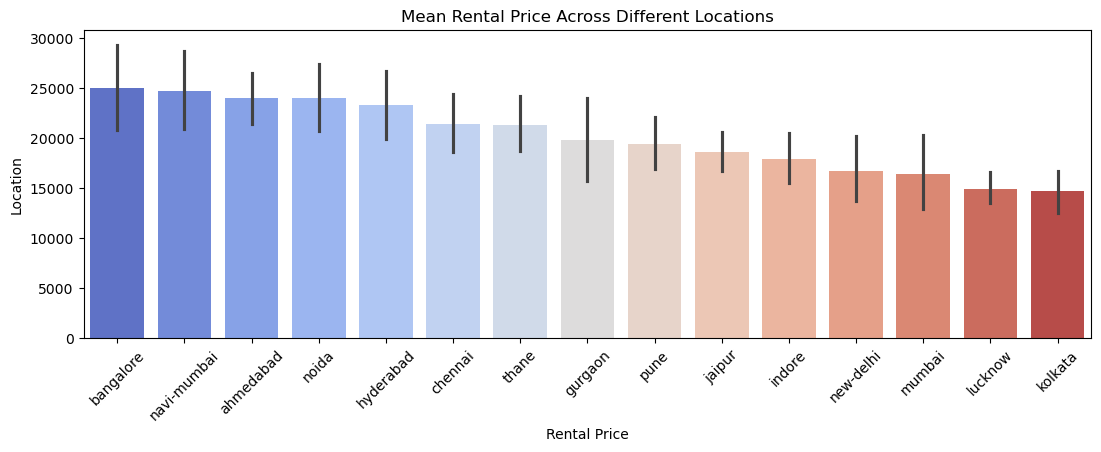

In [147]:
plt.figure(figsize=(13, 4))
sns.barplot(data=df, y='rental_price', x='location', palette='coolwarm', 
            order=df.groupby('location')['rental_price'].mean().sort_values(ascending=False).index)
plt.title('Mean Rental Price Across Different Locations')
plt.xlabel('Rental Price')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.savefig('rentalvslocation.png',dpi=300,bbox_inches='tight')
plt.show()


### insights:
- cities like bangalore, noida, mumbai have highest rents
- location with the IT hubs we can say that affects the pricing (bangalore)\
- smaller cities or suburban have the more affordable rental prices

C:\Users\DELL\AppData\Local\Temp\ipykernel_9600\1806223353.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='furnishing', x='rental_price', palette='coolwarm',


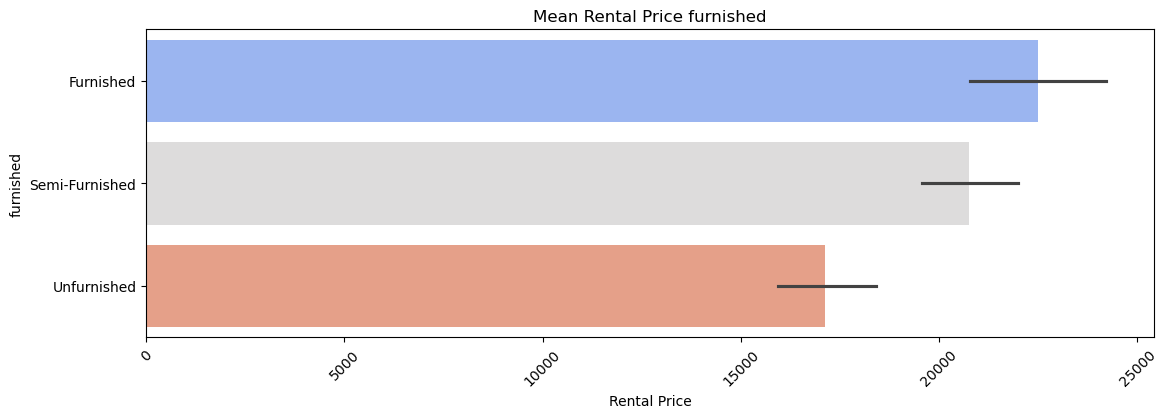

In [149]:
plt.figure(figsize=(13, 4))
sns.barplot(data=df, y='furnishing', x='rental_price', palette='coolwarm', 
            order=df.groupby('furnishing')['rental_price'].mean().sort_values(ascending=False).index)
plt.title('Mean Rental Price furnished')
plt.xlabel('Rental Price')
plt.ylabel('furnished')
plt.xticks(rotation=45)
plt.savefig('furnishedvsprice.png',dpi=300,bbox_inches='tight')
plt.show()


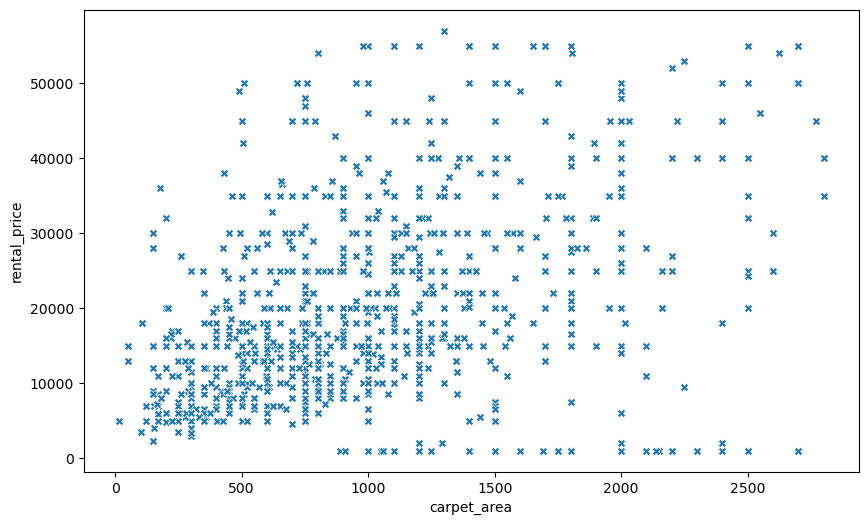

In [151]:
# rental price vs carpet area
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['carpet_area'],y=df['rental_price'],marker="X")
plt.savefig('rentvscarpet.png',dpi=300,bbox_inches='tight')
plt.show()

### insights:
- largest carpet area generally leads to higher rental prices.
- most of the property have 500 to 1500 sqft and have rental price between 10k to 20k

C:\Users\DELL\AppData\Local\Temp\ipykernel_9600\21354240.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['bhk'], y=df['rental_price'], estimator=np.mean, palette="coolwarm")


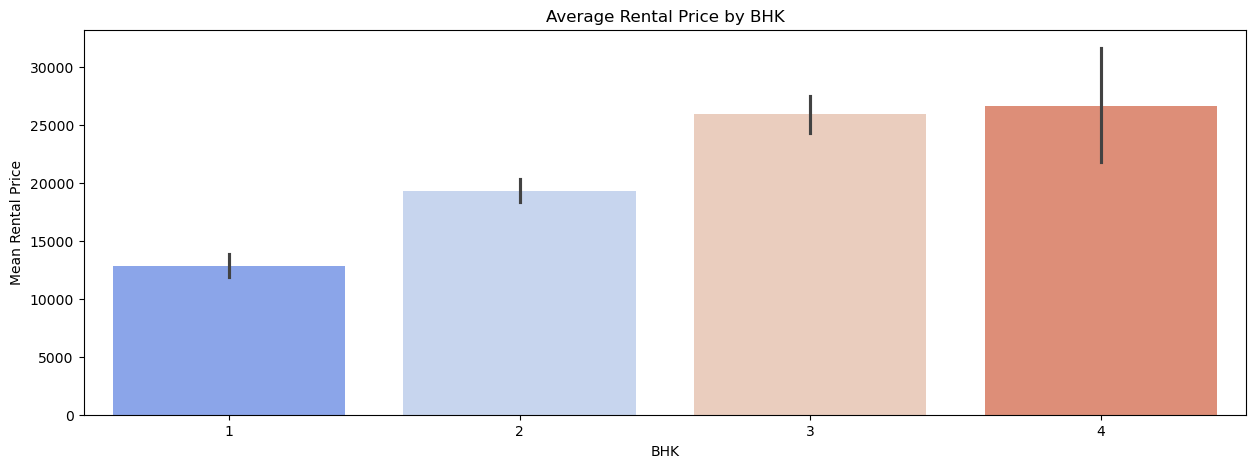

In [153]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['bhk'], y=df['rental_price'], estimator=np.mean, palette="coolwarm")
plt.title("Average Rental Price by BHK")
plt.xlabel("BHK")
plt.ylabel("Mean Rental Price")
plt.savefig('bhkrental.png',dpi=300,bbox_inches='tight')
plt.show()


### insights:
- 1 bhk and 2 bhk properties have average rents, while 3 bhk and above show higher rental prices.
- Larger bhks have higher rents. 

<Axes: xlabel='tenant_preferred', ylabel='rental_price'>

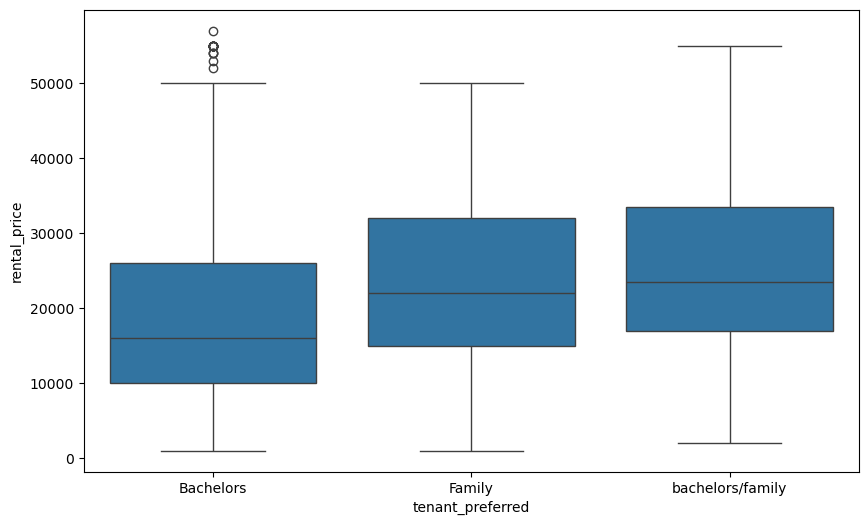

In [155]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['tenant_preferred'],y=df['rental_price'])

### insights:
- Families drive the premium rental market, while bachelors contribute to budget housing demand.
- Landlords should set rental prices based on target tenants to optimize occupancy and income.

### *Conclusion*  

- *Rental prices vary by city*, with Mumbai, Delhi, and Bangalore being the highest.  
- *2 BHK properties are most common*, with semi-furnished flats in high demand.    
- *Families prefer society flats, while bachelors opt for smaller apartments.*  
- *Carpet area impact rental prices significantly.*  
- *Insights help tenants and investors make informed property decisions.*